# Tennis analysis

### Question or problem definition

We want to see if we can create a prediction model that can predict whether a player will win a match or not, based on different statistics

### Acquire training and testing data

import librairies :

In [596]:
# dataframe manipulation
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Acquire data from csv :

We want to collect a list of matches with the following information :
- match_id
- date
- surface
- best_of (3 sets win => best_of = 5)
- winner_rank
- loser_rank
- winner_rank_points
- loser_rank_points
- winner_elo_rating
- loser_elo_rating
- winner_age
- loser_age
- winner_height
- loser_height

>SELECT match_id, date, surface, best_of, winner_rank, loser_rank, winner_rank_points, loser_rank_points, winner_elo_rating, loser_elo_rating, winner_age, loser_age, winner_height, loser_height FROM match;

We want to add stats before matches to it :

For example if we want to get aces from nadal given a date we have to do :
> SELECT AVG(ps.p_ace), AVG(ps.o_ace) FROM (SELECT p_matches, p_ace, o_matches, o_ace, match_id, date, player_id FROM player_match_stats_v WHERE player_id=4742 AND date <= '2016/01/01') ps;

final statement to get 2018 matches with their stats :

>SELECT pms.match_id, pms.date, pms.surface, pms.level, pms.round, pms.best_of, pms.player_id, pms.opponent_id, pms.player_rank, pms.opponent_rank, pms.player_elo_rating, pms.opponent_elo_rating, pms.player_age, pms.opponent_age, pms.player_height, pms.opponent_height, pms.outcome, pms.p_matches, pms.o_matches, pms.p_sets, pms.o_sets, pms.p_games, pms.o_games, pms.p_tbs, pms.o_tbs, pms.p_ace, pms.p_df, pms.p_sv_pt, pms.p_1st_in, pms.p_1st_won, pms.p_2nd_won, pms.p_sv_gms, pms.p_bp_sv, pms.p_bp_fc, pms.o_ace, pms.o_df, pms.o_sv_pt, pms.o_1st_in, pms.o_1st_won, pms.o_2nd_won, pms.o_sv_gms, pms.o_bp_sv, pms.o_bp_fc, pms.minutes, pms.p_upsets, pms.o_upsets, ps.p_avg_ace, ps.p_avg_df, ps.p_avg_sv_pt, ps.p_avg_1st_in, ps.p_avg_1st_won, ps.p_avg_2nd_won, ps.p_avg_sv_gms, ps.p_avg_bp_sv, ps.p_avg_bp_fc, ps.o_avg_ace, ps.o_avg_df, ps.o_avg_sv_pt, ps.o_avg_1st_in, ps.o_avg_1st_won, ps.o_avg_2nd_won, ps.o_avg_sv_gms, ps.o_avg_bp_sv, ps.o_avg_bp_fc FROM player_match_stats_v pms LEFT JOIN LATERAL (SELECT ROUND(AVG(p_ace), 2) p_avg_ace, ROUND(AVG(p_df), 2) p_avg_df, ROUND(AVG(p_sv_pt), 2) p_avg_sv_pt, ROUND(AVG(p_1st_in), 2) p_avg_1st_in, ROUND(AVG(p_1st_won), 2) p_avg_1st_won, ROUND(AVG(p_2nd_won), 2) p_avg_2nd_won, ROUND(AVG(p_sv_gms), 2) p_avg_sv_gms, ROUND(AVG(p_bp_sv), 2) p_avg_bp_sv, ROUND(AVG(p_bp_fc), 2) p_avg_bp_fc, ROUND(AVG(o_ace), 2) o_avg_ace, ROUND(AVG(o_df), 2) o_avg_df, ROUND(AVG(o_sv_pt), 2) o_avg_sv_pt, ROUND(AVG(o_1st_in), 2) o_avg_1st_in, ROUND(AVG(o_1st_won), 2) o_avg_1st_won, ROUND(AVG(o_2nd_won), 2) o_avg_2nd_won, ROUND(AVG(o_sv_gms), 2) o_avg_sv_gms, ROUND(AVG(o_bp_sv), 2) o_avg_bp_sv, ROUND(AVG(o_bp_fc), 2) o_avg_bp_fc, player_id FROM player_match_stats_v WHERE date <= pms.date GROUP BY player_id) ps ON (pms.player_id=ps.player_id) WHERE pms.date >= '2018-01-01' AND pms.date <='2018-12-31';

In [597]:
tennis = pd.read_csv('2018 matches/matches.csv', delimiter=';')

In [598]:
tennis.head()

,match_id,date,surface,level,round,best_of,player_id,opponent_id,player_rank,opponent_rank,...,p_avg_bp_fc,o_avg_ace,o_avg_df,o_avg_sv_pt,o_avg_1st_in,o_avg_1st_won,o_avg_2nd_won,o_avg_sv_gms,o_avg_bp_sv,o_avg_bp_fc
0,166985,06/04/2018,C,D,RR,3,6030,11769,87.0,64.0,...,7.58,6.20,2.60,76.18,46.70,33.05,14.95,12.28,3.33,6.03
1,167084,09/04/2018,C,B,R32,3,6364,6196,26.0,65.0,...,6.69,7.55,3.74,82.57,49.97,36.63,16.29,12.95,4.18,6.77
2,167085,09/04/2018,C,B,R32,3,5420,4311,93.0,62.0,...,9.05,6.82,3.03,85.92,50.68,36.20,17.91,13.09,4.97,7.82
3,167086,09/04/2018,C,B,R32,3,4291,5902,91.0,61.0,...,7.98,7.96,3.22,80.63,48.48,35.95,16.59,12.79,4.20,6.56
4,167087,09/04/2018,C,B,R32,3,4994,3893,55.0,57.0,...,7.27,5.12,2.70,77.29,48.82,34.54,14.85,12.05,3.75,6.16


In [599]:
tennis.columns

Index(['match_id', 'date', 'surface', 'level', 'round', 'best_of', 'player_id',
       'opponent_id', 'player_rank', 'opponent_rank', 'player_elo_rating',
       'opponent_elo_rating', 'player_age', 'opponent_age', 'player_height',
       'opponent_height', 'outcome', 'p_matches', 'o_matches', 'p_sets',
       'o_sets', 'p_games', 'o_games', 'p_tbs', 'o_tbs', 'p_ace', 'p_df',
       'p_sv_pt', 'p_1st_in', 'p_1st_won', 'p_2nd_won', 'p_sv_gms', 'p_bp_sv',
       'p_bp_fc', 'o_ace', 'o_df', 'o_sv_pt', 'o_1st_in', 'o_1st_won',
       'o_2nd_won', 'o_sv_gms', 'o_bp_sv', 'o_bp_fc', 'minutes', 'p_upsets',
       'o_upsets', 'p_avg_ace', 'p_avg_df', 'p_avg_sv_pt', 'p_avg_1st_in',
       'p_avg_1st_won', 'p_avg_2nd_won', 'p_avg_sv_gms', 'p_avg_bp_sv',
       'p_avg_bp_fc', 'o_avg_ace', 'o_avg_df', 'o_avg_sv_pt', 'o_avg_1st_in',
       'o_avg_1st_won', 'o_avg_2nd_won', 'o_avg_sv_gms', 'o_avg_bp_sv',
       'o_avg_bp_fc'],
      dtype='object')

In [600]:
tennis[tennis['match_id'] == 166985]

,match_id,date,surface,level,round,best_of,player_id,opponent_id,player_rank,opponent_rank,...,p_avg_bp_fc,o_avg_ace,o_avg_df,o_avg_sv_pt,o_avg_1st_in,o_avg_1st_won,o_avg_2nd_won,o_avg_sv_gms,o_avg_bp_sv,o_avg_bp_fc
0,166985,06/04/2018,C,D,RR,3,6030,11769,87.0,64.0,...,7.58,6.20,2.6,76.18,46.70,33.05,14.95,12.28,3.33,6.03
390,166985,06/04/2018,C,D,RR,3,11769,6030,64.0,87.0,...,6.85,5.12,3.7,85.24,51.61,38.42,18.42,13.55,3.88,5.94


In [601]:
tennis['match_id'].nunique()

2943

In [602]:
tennis_non_duplicate = tennis.drop_duplicates(subset='match_id')

In [603]:
tennis_non_duplicate.shape

(2943, 64)

In [604]:
from sklearn.model_selection import train_test_split

In [605]:
train_df, test_df = train_test_split(tennis_non_duplicate)

In [606]:
print("train shape : ", train_df.shape)
print("train test : ", test_df.shape)

train shape :  (2207, 64)
train test :  (736, 64)


Save those to csv :

In [607]:
train_df.to_csv('2018 matches/tennis_matches_stats_train.csv', index=False)
test_df.to_csv('2018 matches/tennis_matches_stats_test.csv', index=False)

Declare new dataframes :

In [608]:
train_df = pd.read_csv('2018 matches/tennis_matches_stats_train.csv')
test_df = pd.read_csv('2018 matches/tennis_matches_stats_test.csv')
combine = [train_df, test_df]

### Analyze by describing data

Which features are available in the dataset?

In [609]:
print(train_df.columns.values)

['match_id' 'date' 'surface' 'level' 'round' 'best_of' 'player_id'
 'opponent_id' 'player_rank' 'opponent_rank' 'player_elo_rating'
 'opponent_elo_rating' 'player_age' 'opponent_age' 'player_height'
 'opponent_height' 'outcome' 'p_matches' 'o_matches' 'p_sets' 'o_sets'
 'p_games' 'o_games' 'p_tbs' 'o_tbs' 'p_ace' 'p_df' 'p_sv_pt' 'p_1st_in'
 'p_1st_won' 'p_2nd_won' 'p_sv_gms' 'p_bp_sv' 'p_bp_fc' 'o_ace' 'o_df'
 'o_sv_pt' 'o_1st_in' 'o_1st_won' 'o_2nd_won' 'o_sv_gms' 'o_bp_sv'
 'o_bp_fc' 'minutes' 'p_upsets' 'o_upsets' 'p_avg_ace' 'p_avg_df'
 'p_avg_sv_pt' 'p_avg_1st_in' 'p_avg_1st_won' 'p_avg_2nd_won'
 'p_avg_sv_gms' 'p_avg_bp_sv' 'p_avg_bp_fc' 'o_avg_ace' 'o_avg_df'
 'o_avg_sv_pt' 'o_avg_1st_in' 'o_avg_1st_won' 'o_avg_2nd_won'
 'o_avg_sv_gms' 'o_avg_bp_sv' 'o_avg_bp_fc']


Categorical :
- Nominal :
    - Surface
- Ordinal :
    - o_matches
    - Level
    - p_matches

Numerical :
- Continous :
    - player_rank, opponent_rank
    - player_age, opponent_age
- Discrete
    - Best_of
    - player_elo_rating, opponent_elo_rating
    - player_height, opponent_height
    
Mixed data types :
- Date
- Round

In [610]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 64 columns):
match_id               2207 non-null int64
date                   2207 non-null object
surface                2207 non-null object
level                  2207 non-null object
round                  2207 non-null object
best_of                2207 non-null int64
player_id              2207 non-null int64
opponent_id            2207 non-null int64
player_rank            2202 non-null float64
opponent_rank          2188 non-null float64
player_elo_rating      2207 non-null int64
opponent_elo_rating    2207 non-null int64
player_age             2207 non-null float64
opponent_age           2204 non-null float64
player_height          1466 non-null float64
opponent_height        1316 non-null float64
outcome                50 non-null object
p_matches              2207 non-null int64
o_matches              2207 non-null int64
p_sets                 2207 non-null int64
o_sets            

Features contain blank, null or empty values :
- train :
    - opponent_height
    - player_height
    - outcome
- test :
    - opponent_height
    - player_height
    - outcome

### Verify how representative is training dataset

In [611]:
train_df.describe()

,match_id,best_of,player_id,opponent_id,player_rank,opponent_rank,player_elo_rating,opponent_elo_rating,player_age,opponent_age,...,p_avg_bp_fc,o_avg_ace,o_avg_df,o_avg_sv_pt,o_avg_1st_in,o_avg_1st_won,o_avg_2nd_won,o_avg_sv_gms,o_avg_bp_sv,o_avg_bp_fc
count,2207.000000,2207.000000,2207.000000,2207.000000,2202.000000,2188.000000,2207.000000,2207.000000,2207.000000,2204.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,167546.837336,3.401450,8725.235161,9753.649298,85.798819,118.345521,1947.574536,1878.964205,27.633114,27.543402,...,6.711823,5.992562,3.040603,80.660073,49.174190,35.068231,15.941138,12.608621,4.128626,6.855329
std,859.494947,0.801267,9193.027660,10547.373641,163.162376,198.616448,175.696680,155.348650,4.649558,4.730181,...,1.304562,1.477502,0.502142,5.434730,3.563913,3.169085,1.518150,0.839258,0.653034,1.125204
min,166073.000000,3.000000,644.000000,644.000000,1.000000,1.000000,1463.000000,1455.000000,14.940000,16.280000,...,0.000000,0.000000,0.000000,32.000000,21.000000,6.000000,2.000000,6.000000,0.000000,2.000000
25%,166797.000000,3.000000,4913.000000,4921.000000,21.000000,36.000000,1838.000000,1784.000000,23.730000,23.850000,...,5.970000,4.990000,2.800000,78.520000,47.520000,33.390000,15.230000,12.240000,3.810000,6.180000
50%,167561.000000,3.000000,5515.000000,5594.000000,49.000000,69.000000,1925.000000,1882.000000,28.040000,27.715000,...,6.680000,5.880000,2.980000,80.350000,48.810000,34.970000,15.850000,12.530000,4.130000,6.800000
75%,168283.500000,3.000000,6284.000000,6364.000000,89.000000,115.000000,2048.000000,1958.000000,31.100000,30.822500,...,7.480000,7.000000,3.140000,82.590000,50.600000,36.400000,16.610000,12.930000,4.460000,7.480000
max,169046.000000,5.000000,52643.000000,52587.000000,1821.000000,1770.000000,2464.000000,2473.000000,39.838467,39.838467,...,15.500000,12.670000,10.000000,149.000000,89.000000,60.500000,31.000000,21.500000,12.000000,15.500000


In [612]:
train_df[train_df['best_of']==3]['match_id'].count() / (train_df['match_id'].count())

0.7992750339827821

We have 80% of the matches that were in best of 3.

In [613]:
train_df.describe(include=['O'])

,date,surface,level,round,outcome
count,2207,2207,2207,2207,50
unique,44,3,6,8,1
top,02/07/2018,H,B,R32,RET
freq,100,1291,888,709,50


- 3 different values for surface (with top H)
- 6 different values for level (with top == B)
- There were 50 withdrawals

In [614]:
train_df[train_df['surface'] == 'H']['match_id'].count() / train_df['match_id'].count()

0.5849569551427277

We have 58% of the matches that were in Hard

### Asumptions based on data analysis

- Correlating : We want to know how well does each feature correlate with winning a match. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.
- Completing : 
    - 
- Correcting : 
    - opponent_height and player_height features may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
    - player_id and opponent_id features may be dropped from training dataset as it does not contribute to predict.
- Creating : 
    - We may want to create a new feature called ace_matches based on p_ace and o_ace.

- Classifying :


In [621]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 27 columns):
surface            2207 non-null object
level              2207 non-null object
round              2207 non-null object
best_of            2207 non-null int64
player_age         2207 non-null float64
opponent_age       2204 non-null float64
p_matches          2207 non-null int64
dif_rank           2184 non-null float64
dif_elo_rating     2207 non-null int64
dif_ace            2197 non-null float64
dif_df             2197 non-null float64
dif_sv_pt          2197 non-null float64
dif_1st_in         2197 non-null float64
dif_1st_won        2197 non-null float64
dif_2nd_won        2197 non-null float64
dif_sv_gms         2197 non-null float64
dif_bp_sv          2197 non-null float64
dif_bp_fc          2197 non-null float64
dif_avg_ace        2205 non-null float64
dif_avg_df         2205 non-null float64
dif_avg_sv_pt      2205 non-null float64
dif_avg_1st_in     2205 non-null float64


In [616]:
train_df.head()

,match_id,date,surface,level,round,best_of,player_id,opponent_id,player_rank,opponent_rank,...,p_avg_bp_fc,o_avg_ace,o_avg_df,o_avg_sv_pt,o_avg_1st_in,o_avg_1st_won,o_avg_2nd_won,o_avg_sv_gms,o_avg_bp_sv,o_avg_bp_fc
0,167593,28/05/2018,C,G,R32,5,5663,4789,9.0,37.0,...,6.97,6.42,3.06,81.50,48.87,33.64,15.31,12.45,4.88,8.33
1,166184,08/01/2018,H,B,F,3,5131,5216,21.0,12.0,...,6.60,6.61,3.08,79.58,47.26,32.67,15.36,12.13,4.41,7.62
2,166394,03/02/2018,C,D,RR,3,22510,5149,482.0,590.0,...,5.67,8.67,5.00,97.00,59.33,47.00,19.33,14.67,4.67,6.00
3,167873,02/07/2018,G,G,R64,5,644,26007,3.0,68.0,...,6.26,4.76,2.93,81.88,50.14,35.35,15.77,12.98,4.11,7.21
4,167729,18/06/2018,G,A,SF,3,4920,4868,22.0,61.0,...,5.25,4.94,2.80,80.65,48.64,32.27,14.39,12.14,4.89,8.79


In [617]:
train_df = train_df.drop(['minutes','p_upsets','o_upsets','p_tbs','o_tbs','p_sets','o_sets','p_games','o_games','player_id','opponent_id','match_id','date','player_height','opponent_height','outcome','o_matches'], axis=1)
combine = [train_df, test_df]
for dataset in combine:
    dataset['dif_rank'] = dataset['player_rank'] - dataset['opponent_rank']
    dataset['dif_elo_rating'] = dataset['player_elo_rating'] - dataset['opponent_elo_rating']
    dataset['dif_ace'] = dataset['p_ace'] - dataset['o_ace']
    dataset['dif_df'] = dataset['p_df'] - dataset['o_df']
    dataset['dif_sv_pt'] = dataset['p_sv_pt'] - dataset['o_sv_pt']
    dataset['dif_1st_in'] = dataset['p_1st_in'] - dataset['o_1st_in']
    dataset['dif_1st_won'] = dataset['p_1st_won'] - dataset['o_1st_won']
    dataset['dif_2nd_won'] = dataset['p_2nd_won'] - dataset['o_2nd_won']
    dataset['dif_sv_gms'] = dataset['p_sv_gms'] - dataset['o_sv_gms']
    dataset['dif_bp_sv'] = dataset['p_bp_sv'] - dataset['o_bp_sv']
    dataset['dif_bp_fc'] = dataset['p_bp_fc'] - dataset['o_bp_fc']
    
train_df = train_df.drop(['player_rank','opponent_rank','player_elo_rating','opponent_elo_rating','p_ace','o_ace','p_df','o_df','p_sv_pt','o_sv_pt','p_1st_in',
                          'o_1st_in','p_1st_won','o_1st_won','p_2nd_won','o_2nd_won','p_sv_gms','o_sv_gms','p_bp_sv','o_bp_sv','p_bp_fc','o_bp_fc'], axis=1)
train_df.head()

,surface,level,round,best_of,player_age,opponent_age,p_matches,p_avg_ace,p_avg_df,p_avg_sv_pt,...,dif_elo_rating,dif_ace,dif_df,dif_sv_pt,dif_1st_in,dif_1st_won,dif_2nd_won,dif_sv_gms,dif_bp_sv,dif_bp_fc
0,C,G,R32,5,27.47,31.74,1,5.46,3.51,79.22,...,101,-2.0,7.0,5.0,-13.0,-4.0,14.0,0.0,4.0,1.0
1,H,B,F,3,29.74,29.29,1,3.03,2.03,78.49,...,-147,-2.0,3.0,6.0,6.0,9.0,-2.0,1.0,1.0,-1.0
2,C,D,RR,3,22.33,29.68,1,8.33,4.33,97.33,...,-97,12.0,-2.0,-17.0,-12.0,-4.0,2.0,0.0,-7.0,-8.0
3,G,G,R64,5,21.20,20.68,1,7.26,3.81,82.17,...,322,-2.0,-6.0,-3.0,17.0,7.0,2.0,2.0,-5.0,-9.0
4,G,A,SF,3,31.07,31.35,1,5.36,2.26,77.39,...,340,-1.0,-2.0,-16.0,-12.0,-7.0,6.0,0.0,-2.0,-3.0


In [619]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['dif_avg_ace'] = dataset['p_avg_ace'] - dataset['o_avg_ace']
    dataset['dif_avg_df'] = dataset['p_avg_df'] - dataset['o_avg_df']
    dataset['dif_avg_sv_pt'] = dataset['p_avg_sv_pt'] - dataset['o_avg_sv_pt']
    dataset['dif_avg_1st_in'] = dataset['p_avg_1st_in'] - dataset['o_avg_1st_in']
    dataset['dif_avg_1st_won'] = dataset['p_avg_1st_won'] - dataset['o_avg_1st_won']
    dataset['dif_avg_2nd_won'] = dataset['p_avg_2nd_won'] - dataset['o_avg_2nd_won']
    dataset['dif_avg_sv_gms'] = dataset['p_avg_sv_gms'] - dataset['o_avg_sv_gms']
    dataset['dif_avg_bp_sv'] = dataset['p_avg_bp_sv'] - dataset['o_avg_bp_sv']
    dataset['dif_avg_bp_fc'] = dataset['p_avg_bp_fc'] - dataset['o_avg_bp_fc']
    
train_df = train_df.drop(['p_avg_ace','o_avg_ace','p_avg_df','o_avg_df','p_avg_sv_pt','o_avg_sv_pt','p_avg_1st_in',
                          'o_avg_1st_in','p_avg_1st_won','o_avg_1st_won','p_avg_2nd_won','o_avg_2nd_won','p_avg_sv_gms','o_avg_sv_gms','p_avg_bp_sv','o_avg_bp_sv','p_avg_bp_fc','o_avg_bp_fc'], axis=1)
train_df.head()

,surface,level,round,best_of,player_age,opponent_age,p_matches,dif_rank,dif_elo_rating,dif_ace,...,dif_bp_fc,dif_avg_ace,dif_avg_df,dif_avg_sv_pt,dif_avg_1st_in,dif_avg_1st_won,dif_avg_2nd_won,dif_avg_sv_gms,dif_avg_bp_sv,dif_avg_bp_fc
0,C,G,R32,5,27.47,31.74,1,-28.0,101,-2.0,...,1.0,-0.96,0.45,-2.28,-2.83,-0.60,1.61,-0.06,-0.64,-1.36
1,H,B,F,3,29.74,29.29,1,9.0,-147,-2.0,...,-1.0,-3.58,-1.05,-1.09,4.68,3.34,-1.11,0.25,-0.31,-1.02
2,C,D,RR,3,22.33,29.68,1,-108.0,-97,12.0,...,-8.0,-0.34,-0.67,0.33,-3.33,-6.00,3.34,0.00,-1.34,-0.33
3,G,G,R64,5,21.20,20.68,1,-65.0,322,-2.0,...,-9.0,2.50,0.88,0.29,1.36,1.96,-0.02,0.01,-0.28,-0.95
4,G,A,SF,3,31.07,31.35,1,-39.0,340,-1.0,...,-3.0,0.42,-0.54,-3.26,1.52,4.47,0.67,0.35,-1.46,-3.54


KeyError: "None of [Index(['dif_ace_matches'], dtype='object')] are in the [columns]"

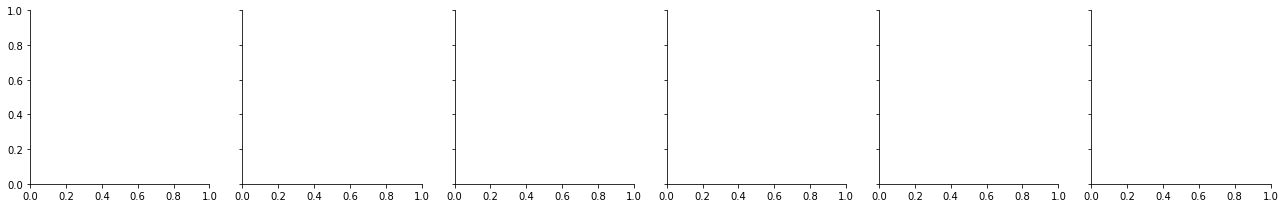

In [620]:
g = sns.FacetGrid(train_df, col='level')
g.map(plt.hist, 'dif_ace_matches', bins=10)